# INTRODUCTION

Implementation
1. Is mostly an exercise in "API hunting"
2. The actual math is not written in code
3. The job is to find the function that implements the math in question
4. The equation y = mx  + b is implemented in Keras layer called Dense
5. Tensorflow code is always written in keras layers

Steps to be followed:
1. Load the data (X and Y)- may involve transforming the data
2. Instantiate the model
3. Train("fir") the model
4. Evaluate the model


Step 1 

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')

  ])

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# LOADING & UNDERSTANDING THE DATASET 

In [8]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-02-22 09:50:20--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-22 09:50:20 (29.9 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [9]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
#data.keys()

In [11]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [10]:
type(data)

numpy.ndarray

In [12]:
X = data[:,0].reshape(-1, 1)
Y = data [:,1]
X,Y

(array([[1971],
        [1972],
        [1973],
        [1973],
        [1974],
        [1974],
        [1974],
        [1975],
        [1976],
        [1976],
        [1976],
        [1978],
        [1978],
        [1979],
        [1979],
        [1979],
        [1981],
        [1982],
        [1982],
        [1983],
        [1984],
        [1984],
        [1985],
        [1985],
        [1985],
        [1986],
        [1986],
        [1986],
        [1987],
        [1987],
        [1987],
        [1987],
        [1988],
        [1988],
        [1989],
        [1989],
        [1989],
        [1989],
        [1990],
        [1991],
        [1991],
        [1992],
        [1992],
        [1993],
        [1993],
        [1994],
        [1994],
        [1995],
        [1999],
        [1995],
        [1996],
        [1997],
        [1997],
        [1997],
        [1998],
        [1999],
        [1999],
        [2000],
        [2000],
        [1999],
        [1999],
        [1999],
        

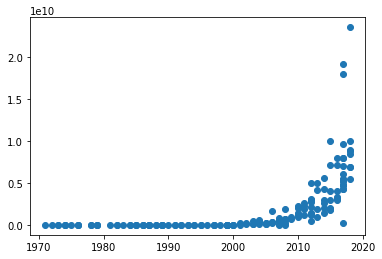

In [13]:
plt.scatter(X, Y)

Since we want linear model we would take log.

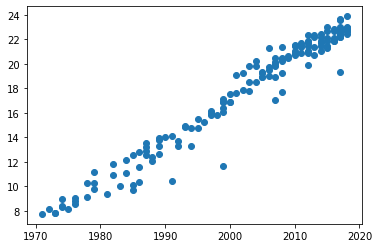

In [14]:
Y = np.log(Y)
plt.scatter(X,Y)

In [15]:
X = X - X.mean()

# MODEL BUILDING

In [16]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1),
])

In classification we use scaling, therfore it does not require custom optimisation. But in this case we havenot applied scaling so it would make customization harder to achieve as for expected value.  Therfeore we need to apply customized optimisation. As shown in brackets with SGD learning rate and momentum

In [17]:
model.compile(optimizer = tf.keras.optimizers.SGD(.001,0.9),
              loss = 'mse')

In [19]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [20]:
 r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 457.9091 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 303.7585 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 264.1576 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 210.8253 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 157.9713 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 120.4083 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 86.7763 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 63.0196 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 54.5342 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 44.1847 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 4

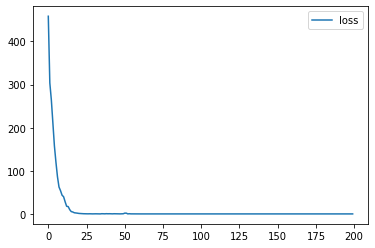

In [21]:
#plot the loss
plt.plot(r.history['loss'], label ='loss')
plt.legend();

In the context of training a model using a deep learning framework such as TensorFlow or PyTorch, callbacks=[scheduler] means that a learning rate scheduler is being used as a callback during training. A learning rate scheduler is a function that adjusts the learning rate during training, often based on some pre-defined schedule. For example, the learning rate might be reduced after a certain number of epochs or when the validation loss stops improving.

By using a learning rate scheduler as a callback, the learning rate can be automatically adjusted during training to improve the performance of the model.

In [22]:
model.layers